In [1]:
# pound signs allow comments
# the following are packages that I find very useful, and will provide needed
# mathematical tools for various homework problems

import math
import fileinput
#numpy and scipy are imported as "np" and "sp" each
import numpy as np
import scipy as sp
import scipy.interpolate
#mathplotlib is what allows me to make plots
import matplotlib.pyplot as plt
#differentiation and integration packages
from scipy.integrate import quad
from scipy.misc import derivative
from scipy.integrate import odeint

#these lines are what I have found makes the plots you make look a bit nicer
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

#this makes plots look prettier
rcParams.update({'figure.autolayout': True})
plt.rc('font', family='serif')

In [2]:
#Python can do basic math, and print the answers

print("2+2=",2+2)

2+2= 4


In [3]:
#You can save the results of an operation for later use. Unlike most programming
#languages, you don't have to define the type of a variable

a = 2+2

In [4]:
print("2+2=",a)

2+2= 4


In [5]:
#to define functions, you do the following (note the indentations)
#give the function a name, and give the names of the input variables
def f(x,alpha):
    #trig functions are implimented in numpy, so we'll use np.sin
    #trig functions assume radians as input, not degrees 
    #pow(x,n) is x^n
    #as an important note: pow is the one function I've found (so far) where
    #you want to be specific that you're using float in the exponent.
    #unfortunately, pow has an annoying habit of dropping decimals if it
    #believes the result is an integer (so it might evaluate 3/2 as 1, not 1.5)
    result = pow(np.sin(alpha*x),2.0)+4

    #this returns the function value. result could have been named anything
    return result

In [6]:
#now let's use that function, at x=pi/3 and alpha = 4
print('f(pi/3,4)=',f(np.pi/3,4))

f(pi/3,4)= 4.75


In [7]:
#Now let's say I want to plot this function. 
#I have to use the matplotlib package

#first, I define a list of x values I will want to know the f(x) values of
#this creates a numpy array from 0 to 10 of 1000 entries (linearly spaced)
x_list = np.linspace(0,10,1000)

In [8]:
#then I act f on each entry
f_list = f(x_list,4)

#If I wanted to check that this worked, I could print the f_list
#entry which corresponds to x=10

print('f(10,4)=',f_list[x_list==10])

f(10,4)= [4.55519362]


In [9]:
#as you can see, there are square brackets [] around the numeric answer
#this is because I asked python to return a list (all the elements of f_list that satisfy x_list = 10)
#there is only one such element, so if I want the number that is in that
#entry, I ask for the 1st element of the list. Python starts lists at 0, not 1

print('f(10,4)=',f_list[x_list==10][0])

f(10,4)= 4.555193621919524


/Users/Matthew/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


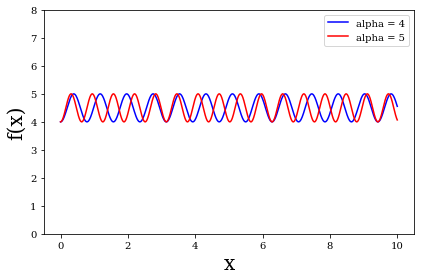

In [10]:
#now let's plot the function
#I have an 'x-axis' (x_list) and a y-axis (f_list)
#to plot them, I first create a plot iteration
fig = plt.figure()
#and name its axis-system
ax = fig.add_subplot(1,1,1)

#give the axes names
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('f(x)',fontsize=20)

#set the axis vertical limit
ax.set_ylim([0,8])

#set a function 

#plot the function
#the 'b' tells the plot to make this line blue. Red would be 'r', black 'k', green 'g', and so on.
#I'm making the line a bit thicker than normal, and making a label for this line
ax.plot(x_list,f_list,'b',linewidth=1.5,label='alpha = 4')

#I can also create the function list to be plotted on the y-axis on the fly 
#rather than creating it as a list previously. Keep in mind that
#if the function takes a long time to execute, it is better to create the y-axis list
#once (as I did when I defined 'f_list') rather than making your computer continually recompute it
#every time you want to remake the plot
ax.plot(x_list,f(x_list,5),'r',linewidth=1.5,label='alpha = 5')

#put a legend (with the labels from the plot commands) in the upper right
#other options are lower left, lower right, etc
ax.legend(loc='upper right')

#this will save the figure as a pdf
#comment out this next line if you don't want to create the plot file
plt.savefig("example.pdf",format='pdf')

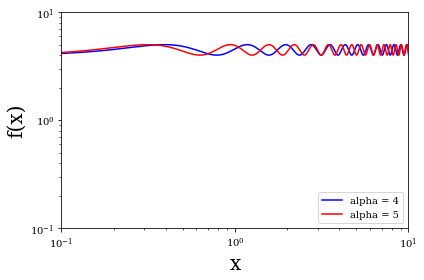

In [11]:
#now let's make a log version of the plots
#create a new plot instance
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('f(x)',fontsize=20)

#this time set the plots to be log-log
ax.set_xscale('log')
ax.set_yscale('log')

#set the axis vertical limit (can't be from 0)
ax.set_ylim([0.1,10])
#set the axis horizontal limits (can't be from 0)
ax.set_xlim([0.1,10])

ax.plot(x_list,f_list,'b',linewidth=1.5,label='alpha = 4')
ax.plot(x_list,f(x_list,5),'r',linewidth=1.5,label='alpha = 5')
ax.legend(loc='lower right')

In [12]:
#sometimes when making log plots, the spacing of your equivalent of x_list
#might be insufficient and you'll miss important changes in the function.
#So instead of np.linspace you'd use something like
xlog_list = np.logspace(-1,1,1000)
#this creates a list from 1e-1 (0.1) to 1e1 (10), with logarithmic spacing

#for the function I created, this isn't an issue, but let me show you how to use this anyway

In [13]:
flog_list = f(xlog_list,4)

In [14]:
#let's compare the two lists by printing the first 10 elements of each 
#(remember, python starts indexing at zero)
print('linear spacing',x_list[0:10])
print('log spacing',xlog_list[0:10])

linear spacing [0.         0.01001001 0.02002002 0.03003003 0.04004004 0.05005005
 0.06006006 0.07007007 0.08008008 0.09009009]
log spacing [0.1        0.10046204 0.10092622 0.10139254 0.10186102 0.10233166
 0.10280447 0.10327947 0.10375667 0.10423607]


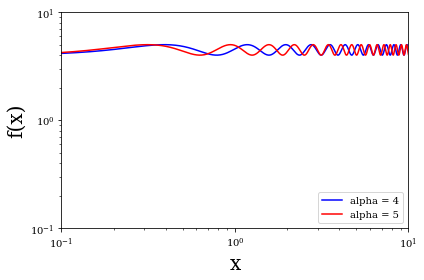

In [15]:
#now let's make a log version of the plots
#create a new plot instance
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('f(x)',fontsize=20)

#this time set the plots to be log-log
ax.set_xscale('log')
ax.set_yscale('log')

#set the axis vertical limit (can't be from 0)
ax.set_ylim([0.1,10])
#set the axis horizontal limits (can't be from 0)
ax.set_xlim([0.1,10])

ax.plot(xlog_list,flog_list,'b',linewidth=1.5,label='alpha = 4')
ax.plot(xlog_list,f(xlog_list,5),'r',linewidth=1.5,label='alpha = 5')
ax.legend(loc='lower right')

In [17]:
#Numerical integration
#the numerical integrator in numpy is called "quad" 
#I imported it in the header of this document
#if I wanted to integrate my function from 0 to 10 I would do it like so:
integral = quad(f,0,10.,args=(4.0))
#the arguments go "function name", lower limit of integration, upper limit
#then arguments. In this case, since f takes 2 arguments, you have to specify
#the 2nd argument (alpha). The way quad works requires that the integral
#be over the 1st variable in the function definition

#quad gives both the integral and the error in a list of two elements
print("integral of f, 0 to 10 = ",integral)
#so the integral itself would be the 1st element of the list
print("actual integral = ",integral[0])

integral of f, 0 to 10 =  (45.06211804087021, 2.8684457221051125e-12)
actual integral =  45.06211804087021


In [18]:
#if we wanted to plot the integral of f, we need to build a list with
#the integral values. We'd so it like this:

#define an empty list (this is a numpy array, which has more useful properties
# than a default python array):
integral_list = np.array([])
#populate the list
for x in x_list:
    #get the integral from 0 to x
    integral = quad(f,0,x,args=(4.0))[0]
    #add it to the list
    integral_list = np.concatenate([integral_list,[integral]])

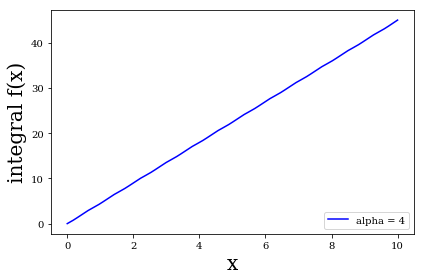

In [19]:
#then we can plot the integral
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('integral f(x)',fontsize=20)

ax.plot(x_list,integral_list,'b',linewidth=1.5,label='alpha = 4')
ax.legend(loc='lower right')

In [20]:
#suppose you wanted to use your numerically integrated function
#with a point other than the one you got from x_list. 
#In this example, I've defined a function that is "easy" to integrate,
#so you'd just use quad to calculate the integral for a new point
#But there are many examples in physics where the integral is very "expensive"
#in computing power and time to calculate. So you might prefer to calculate
#a predefined list of integrals for only certain inputs, and infer the
#answer for points in between (obviously, this only works if the integral is
#not oscillating wildly). In these cases, you can 
#create an interpolated function

def interpolated_f_integral(x):
    #using the interp function from numpy
    #the command takes a new point (x), and interpolates using the
    #previously defined x array (x_list) and y_array (integral_list)
    return np.interp(x,x_list,integral_list)

#so, for example, there's no entry in x_list equal to x=0.107
print(x_list[x_list==0.107])
#so integral_list doesn't have an entry for x=0.107
#for this example, we could of course just integrate f from 0 to 0.107
#but sometimes that's not possible or convenient. So we can do
print('example of interpolation= ', interpolated_f_integral(0.107))
#keep in mind interpolation is not magic. If you try to interpolate in 
#a region where the function is rapidly changing and your interpolation
#list isn't finely enough separated, you'll get incorrect answers
#as always, it is your responsibility to look at what you're asking 
#python to do and figure out if the results are reasonable.

[]
example of interpolation=  0.4343304507285945


In [21]:
#numerical solutions to differential equations

#suppose we wanted to numerically solve df/dx = -4f, f(0) = 10.
#we use the odeint function (ordinary differential equation integrator)

#first you define the right hand side of the equation you need to solve
#the 1st argument is the function to be solved for, the 2nd the coordinate
#any extra inputs come after. To give an example, I'll include an alpha
#which I'll set later to be 4
def rhs(f,x,alpha):
    return -1*alpha*f

In [22]:
#the 2nd entry must be the value of f at zero
solve_list = odeint(rhs,10.0,x_list,args=(4.0,))
#the extra hanging ',' in the args is because python is expecting a list here
#even though there's only 1 entry

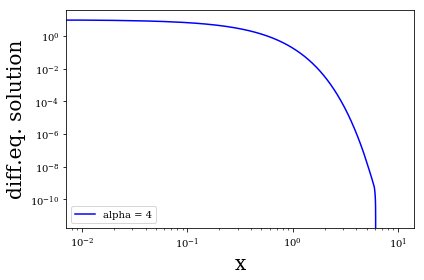

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('diff.eq. solution',fontsize=20)

ax.plot(x_list,solve_list,'b',linewidth=1.5,label='alpha = 4')
ax.legend(loc='lower left')

#this will show the plots when you execute the python script.
plt.show()


In [ ]:
#python is a fully-fledged programming language, and a remarkably versatile one
#it is slower computationally than C or FORTRAN (C is the base of python)
#but that slow-down is unlikely to matter unless you are running millions
#of calculations in sequence. 

#The language is relatively easy to learn, and combined with
#numpy, scip, matplotlib, and more specialized libraries that exist for
#astrophysics and other hard sciences, is a really useful tool to have
#I would recommend learning it, if you are planning on being involved
#in data manipulation and numeric computation. 